In [1]:

import numpy as np
import pandas as pd

In [3]:
from subprocess import check_output


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [5]:
df = pd.read_csv('modified.csv')

In [6]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.dropna(inplace=True)

In [9]:
print(df)

       Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
5939      Cobar     17.9     35.2       0.0         12.0      12.3   
5940      Cobar     18.4     28.9       0.0         14.8      13.0   
5942      Cobar     19.4     37.6       0.0         10.8      10.6   
5943      Cobar     21.9     38.4       0.0         11.4      12.2   
5944      Cobar     24.2     41.0       0.0         11.2       8.4   
5945      Cobar     27.1     36.1       0.0         13.0       0.0   
5946      Cobar     23.3     34.0       0.0          9.8      12.6   
5947      Cobar     16.1     34.2       0.0         14.6      13.2   
5948      Cobar     19.0     35.5       0.0         12.0      12.3   
5949      Cobar     19.7     35.5       0.0         11.0      12.7   
5950      Cobar     20.9     37.8       0.0         12.8      13.2   
5951      Cobar     23.9     39.1       0.0         13.8      12.1   
5952      Cobar     24.9     41.2       0.0         14.8      13.0   
5953      Cobar     

In [12]:
df["Location"]=df["Location"].astype('category')
df["Location"]=df["Location"].cat.codes

df["WindGustDir"]=df["WindGustDir"].astype('category')
df["WindGustDir"]=df["WindGustDir"].cat.codes

df["WindDir9am"]=df["WindDir9am"].astype('category')
df["WindDir9am"]=df["WindDir9am"].cat.codes

df["WindDir3pm"]=df["WindDir3pm"].astype('category')
df["WindDir3pm"]=df["WindDir3pm"].cat.codes

df["RainToday"]=df["RainToday"].astype('category')
df["RainToday"]=df["RainToday"].cat.codes

df["RainTomorrow"]=df["RainTomorrow"].astype('category')
df["RainTomorrow"]=df["RainTomorrow"].cat.codes

In [13]:
df["MinTemp"] = (df["MinTemp"] - df["MinTemp"].mean()) / (df["MinTemp"].max() - df["MinTemp"].min())
df["MaxTemp"] = (df["MaxTemp"] - df["MaxTemp"].mean()) / (df["MaxTemp"].max() - df["MaxTemp"].min())
df["Rainfall"] = (df["Rainfall"] - df["Rainfall"].mean()) / (df["Rainfall"].max() - df["Rainfall"].min())
df["Evaporation"] = (df["Evaporation"] - df["Evaporation"].mean()) / (df["Evaporation"].max() - df["Evaporation"].min())
df["Sunshine"] = (df["Sunshine"] - df["Sunshine"].mean()) / (df["Sunshine"].max() - df["Sunshine"].min())
df["WindGustSpeed"] = (df["WindGustSpeed"] - df["WindGustSpeed"].mean()) / (df["WindGustSpeed"].max() - df["WindGustSpeed"].min())
df["WindSpeed9am"] = (df["WindSpeed9am"] - df["WindSpeed9am"].mean()) / (df["WindSpeed9am"].max() - df["WindSpeed9am"].min())
df["WindSpeed3pm"] = (df["WindSpeed3pm"] - df["WindSpeed3pm"].mean()) / (df["WindSpeed3pm"].max() - df["WindSpeed3pm"].min())
df["Humidity9am"] = (df["Humidity9am"] - df["Humidity9am"].mean()) / (df["Humidity9am"].max() - df["Humidity9am"].min())
df["Humidity3pm"] = (df["Humidity3pm"] - df["Humidity3pm"].mean()) / (df["Humidity3pm"].max() - df["Humidity3pm"].min())
df["Pressure9am"] = (df["Pressure9am"] - df["Pressure9am"].mean()) / (df["Pressure9am"].max() - df["Pressure9am"].min())
df["Pressure3pm"] = (df["Pressure3pm"] - df["Pressure3pm"].mean()) / (df["Pressure3pm"].max() - df["Pressure3pm"].min())
df["Cloud9am"] = (df["Cloud9am"] - df["Cloud9am"].mean()) / (df["Cloud9am"].max() - df["Cloud9am"].min())
df["Cloud3pm"] = (df["Cloud3pm"] - df["Cloud3pm"].mean()) / (df["Cloud3pm"].max() - df["Cloud3pm"].min())
df["Temp9am"] = (df["Temp9am"] - df["Temp9am"].mean()) / (df["Temp9am"].max() - df["Temp9am"].min())
df["Temp3pm"] = (df["Temp3pm"] - df["Temp3pm"].mean()) / (df["Temp3pm"].max() - df["Temp3pm"].min())

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [15]:
y = df['RainTomorrow']
x = df.drop(['RainTomorrow'], axis=1)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.25, random_state=27)

In [17]:
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001)


In [18]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.52047412
Iteration 2, loss = 0.47292870
Iteration 3, loss = 0.43181137
Iteration 4, loss = 0.40632517
Iteration 5, loss = 0.39284558
Iteration 6, loss = 0.38449701
Iteration 7, loss = 0.37860056
Iteration 8, loss = 0.37331019
Iteration 9, loss = 0.36878103
Iteration 10, loss = 0.36502008
Iteration 11, loss = 0.36334406
Iteration 12, loss = 0.35937695
Iteration 13, loss = 0.36065794
Iteration 14, loss = 0.35642516
Iteration 15, loss = 0.35615161
Iteration 16, loss = 0.35306888
Iteration 17, loss = 0.35284609
Iteration 18, loss = 0.35084515
Iteration 19, loss = 0.35175248
Iteration 20, loss = 0.35088872
Iteration 21, loss = 0.35066692
Iteration 22, loss = 0.35078798
Iteration 23, loss = 0.34854448
Iteration 24, loss = 0.34808577
Iteration 25, loss = 0.34773706
Iteration 26, loss = 0.34830470
Iteration 27, loss = 0.34868619
Iteration 28, loss = 0.34731035
Iteration 29, loss = 0.34730219
Iteration 30, loss = 0.34786415
Iteration 31, loss = 0.34554405
Iteration 32, los

In [19]:
accuracy_score(y_test, y_pred)

0.8543778801843318

In [20]:
cm = confusion_matrix(y_test, y_pred)

In [21]:
print(cm)

[[10369   673]
 [ 1381  1682]]


In [22]:
cm

array([[10369,   673],
       [ 1381,  1682]], dtype=int64)

In [23]:
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
Actual,,,
0,10369,673,11042
1,1381,1682,3063
All,11750,2355,14105


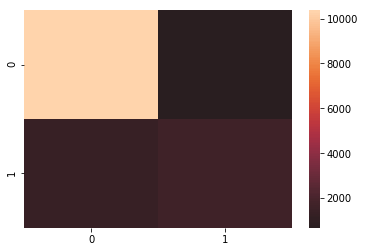

In [25]:
sns.heatmap(cm, center=False)
plt.show()

In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

In [27]:
print("Precision Score is ", precision_score(y_test,y_pred))

Precision Score is  0.7142250530785562


In [28]:
print("Recall Score is ", recall_score(y_test,y_pred))

Recall Score is  0.5491348351289586


In [29]:
print("F1 Score: {}".format(f1_score(y_test,y_pred)))

F1 Score: 0.6208933185677372


In [30]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.94      0.91     11042
          1       0.71      0.55      0.62      3063

avg / total       0.85      0.85      0.85     14105

